In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [18]:
def ar1(rho,T):
    y = np.zeros(T)
    for t in np.arange(T-1):
        if t == 0:
            y[t+1] = rho*y[t] +0.01
        else:
            y[t+1] = rho*y[t] 
        
    return y

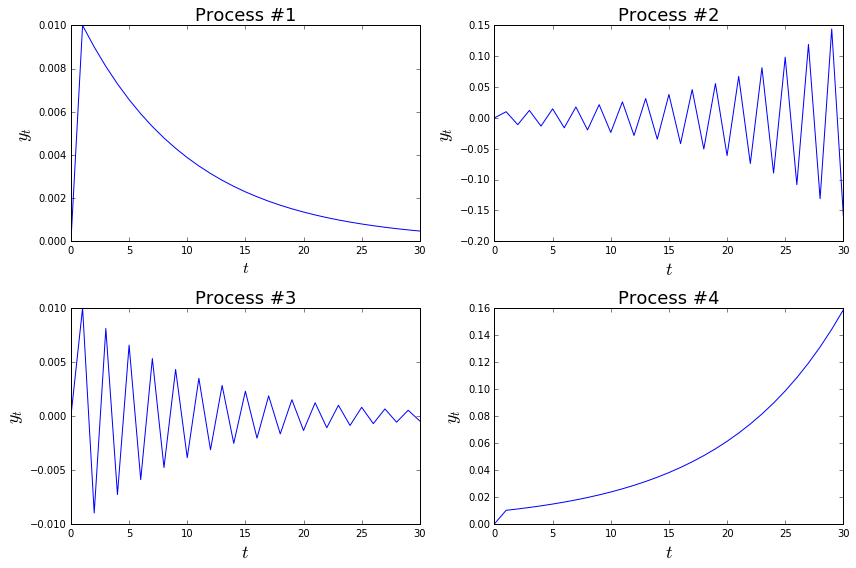

In [19]:
T = 31

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.plot(ar1(rho=0.9,T=T))
ax2.plot(ar1(rho=-1.1,T=T))
ax3.plot(ar1(rho=-0.9,T=T))
ax4.plot(ar1(rho=1.1,T=T))

ax1.set_title('Process #1',fontsize=18)
ax2.set_title('Process #2',fontsize=18)
ax3.set_title('Process #3',fontsize=18)
ax4.set_title('Process #4',fontsize=18)

ax1.set_xlabel('$t$',fontsize=16)
ax2.set_xlabel('$t$',fontsize=18)
ax3.set_xlabel('$t$',fontsize=18)
ax4.set_xlabel('$t$',fontsize=18)

ax1.set_ylabel('$y_t$',fontsize=18)
ax2.set_ylabel('$y_t$',fontsize=18)
ax3.set_ylabel('$y_t$',fontsize=18)
ax4.set_ylabel('$y_t$',fontsize=18)

fig.tight_layout()

plt.savefig('fig_ar1s.png',dpi=120,bbox_inches='tight',transparent=True)

In [2]:
# 0. Setup

# 0.1 general plot settings

font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'


# 0.2 Formatter for inserting commas in y axis labels with magnitudes in the thousands

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = plt.FuncFormatter(func)  # make formatter

# 0.3 format the x axis ticksticks
years2,years4,years5,years10,years15= dts.YearLocator(2),dts.YearLocator(4),dts.YearLocator(5),dts.YearLocator(10),dts.YearLocator(15)


# 0.4 y label locator for vertical axes plotting gdp
majorLocator_y   = plt.MultipleLocator(3)
majorLocator_shares   = plt.MultipleLocator(0.2)

# 0.5 Index locator
def findDateIndex(dateStr,fredObj):
    for n,d in enumerate(fredObj.dates):
        if d == dateStr:
            return n

# 0.6 Horizontal brace
def horizontalBrace(x1,x2,y,amplitude=None,shift=0.5,curve=None,width=2,color='black',reverse=False,increment=None,plot=True,xDateStrings=False):
    
    if xDateStrings==True:
        
        x1 = dateutil.parser.parse(x1).toordinal()
        x2 = dateutil.parser.parse(x2).toordinal()
    
    if amplitude==None:
        
        amplitude = (x2-x1)/1.61803398
    
    if increment==None:
        increment= (x2-x1)/100000
    d = (x2-x1)
    b = amplitude/2
    if curve==None:
        a=b
    else:
         a=curve*d/4   
    linseg1 = shift*(d-4*a)
    linseg2 = (1-shift)*(d-4*a)
    
    xSeg1 = np.arange(-d/2,-d/2+a,increment)
    xSeg2 = np.arange(-d/2+a,-d/2+a+linseg1,increment)
    xSeg3 = np.arange(-d/2+a+linseg1,-d/2+2*a+linseg1,increment)
    xSeg4 = np.arange(d/2-2*a-linseg2,d/2-a-linseg2,increment)
    xSeg5 = np.arange(d/2-a-linseg2,d/2-a,increment)
    xSeg6 = np.arange(d/2-a,d/2,increment)
    
    
    ySeg1 = b*np.sqrt(1 - ((xSeg1+d/2-a)/a)**2)
    ySeg2 = b+0*xSeg2
    ySeg3 = 2*b-b*np.sqrt(1 - ((xSeg3+a + d/2-2*a-linseg1)/a)**2)
    ySeg4 = 2*b-b*np.sqrt(1 - ((xSeg4-a+ d/2-2*a-linseg1)/a)**2)
    ySeg5 = b+0*xSeg5
    ySeg6 = b*np.sqrt(1 - ((xSeg6 -d/2+a)/a)**2)
    
    bracex = np.array([])
    for series in [xSeg1, xSeg2, xSeg3, xSeg4, xSeg5, xSeg6]:
        bracex = np.append(bracex,series)
    bracey = np.array([])
    for series in [ySeg1, ySeg2, ySeg3, ySeg4, ySeg5, ySeg6]:
        bracey = np.append(bracey,series)
    if reverse==True:
        bracey = -bracey

    bracex = bracex + (x2+x1)/2
    bracey = bracey + y
    
    if plot==True:
        plt.plot(bracex,bracey,color=color,lw=width)
    return bracex,bracey

# 0.6 Vertical brace
def verticalBrace(x,y1,y2,amplitude=None,shift=0.5,curve=None,width=2,color='black',reverse=False,increment=None,plot=True,xDateStrings=False):
    
    if xDateStrings==True:
        
        x = dateutil.parser.parse(x).toordinal()
        
    if amplitude==None:
        
        amplitude = (y2-y1)/1.61803398
    
    if increment==None:
        increment= (y2-y1)/100000
    d = (y2-y1)
    b = amplitude/2
    if curve==None:
        a=b
    else:
         a=curve*d/4   
    linseg1 = shift*(d-4*a)
    linseg2 = (1-shift)*(d-4*a)
    
    ySeg1 = np.arange(-d/2,-d/2+a,increment)
    ySeg2 = np.arange(-d/2+a,-d/2+a+linseg1,increment)
    ySeg3 = np.arange(-d/2+a+linseg1,-d/2+2*a+linseg1,increment)
    ySeg4 = np.arange(d/2-2*a-linseg2,d/2-a-linseg2,increment)
    ySeg5 = np.arange(d/2-a-linseg2,d/2-a,increment)
    ySeg6 = np.arange(d/2-a,d/2,increment)
    
    
    xSeg1 = b*np.sqrt(1 - ((ySeg1+d/2-a)/a)**2)
    xSeg2 = b+0*ySeg2
    xSeg3 = 2*b-b*np.sqrt(1 - ((ySeg3+a + d/2-2*a-linseg1)/a)**2)
    xSeg4 = 2*b-b*np.sqrt(1 - ((ySeg4-a+ d/2-2*a-linseg1)/a)**2)
    xSeg5 = b+0*ySeg5
    xSeg6 = b*np.sqrt(1 - ((ySeg6 -d/2+a)/a)**2)
    
    bracex = np.array([])
    for series in [xSeg1, xSeg2, xSeg3, xSeg4, xSeg5, xSeg6]:
        bracex = np.append(bracex,series)
    bracey = np.array([])
    for series in [ySeg1, ySeg2, ySeg3, ySeg4, ySeg5, ySeg6]:
        bracey = np.append(bracey,series)
    if reverse==True:
        bracex = -bracex

    bracex = bracex + x
    bracey = bracey + (y2+y1)/2
    
    if plot==True:
        plt.plot(bracex,bracey,color=color,lw=width)
    return bracex,bracey

/Users/bcjenkin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:121: RuntimeWarning: invalid value encountered in sqrt


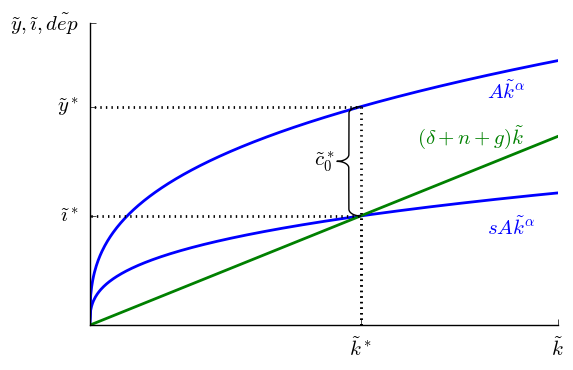

In [3]:
# Question 1(c)
A = 1
alpha = 0.35
s=0.5
delta = 5

step = 0.0001
k = np.arange(0,.06+step,step)
y = A*k**alpha
i = s*A*k**alpha
dep=delta*k

kss = (s*A/(delta))**(1/(1-alpha))
yss = A*kss**alpha
iss = s*yss
css = yss-iss


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(k,y,lw=2,color='blue')
ax.plot(k,i,lw=2,color='blue')
ax.plot(k,dep,lw=2,color='green')

ax.plot([kss,kss,0],[0,iss,iss],'k:',lw=2)
ax.plot([kss,kss,0],[0,yss,yss],'k:',lw=2)

ax.set_xticks([kss,0.05])
ax.set_xticklabels(['$\\tilde{k}^*$','$\\tilde{k}$'])
ax.set_yticks([iss,yss,0.4])
ax.set_yticklabels(['$\\tilde{\\imath}^*$','$\\tilde{y}^*$','$\\tilde{y},\\tilde{\\imath},\\tilde{dep}$'])

ax.set_xlim([0,0.05])
ax.set_ylim([0,0.4])

verticalBrace(kss,iss,yss,amplitude=0.0025,shift=0.5,curve=0.25,width=1,color='black',reverse=True,increment=None,plot=True,xDateStrings=False)

ax.annotate('$\\tilde{c}_0^*$', xy=(kss, 0),  xycoords='data',xytext=(kss-0.005, 0.21), textcoords='data',)
ax.annotate('$A\\tilde{k}^{\\alpha}$', xy=(kss, 0),  xycoords='data',xytext=(0.0425,0.3), textcoords='data',color='blue')
ax.annotate('$(\\delta+ n + g)\\tilde{k}$', xy=(kss, 0),  xycoords='data',xytext=(0.035,0.24), textcoords='data',color='green')
ax.annotate('$sA\\tilde{k}^{\\alpha}$', xy=(kss, 0),  xycoords='data',xytext=(0.0425,0.12), textcoords='data',color='blue')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()
plt.savefig('Fig_Econ100C_Spring2016_Exam2_VersionA_Key_1c.png',bbox_inches='tight',dpi=120)

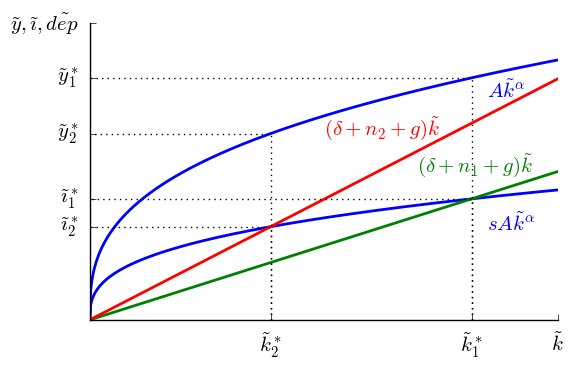

In [4]:
# Question 2(a)
A = 1
alpha = 0.35
s=0.5
delta1 = 4
delta2 = 6.5

step = 0.0001
k = np.arange(0,.06+step,step)
y = A*k**alpha
i = s*A*k**alpha
dep1=delta1*k
dep2=delta2*k

kss2 = (s*A/(delta2))**(1/(1-alpha))
yss2 = A*kss2**alpha
iss2 = s*yss2
css2 = yss2-iss2

kss1 = (s*A/(delta1))**(1/(1-alpha))
yss1 = A*kss1**alpha
iss1 = s*yss1
css1 = yss1-iss1


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(k,y,lw=2,color='blue')
ax.plot(k,i,lw=2,color='blue')
ax.plot(k,dep1,lw=2,color='green')
ax.plot(k,dep2,lw=2,color='red')

ax.plot([kss1,kss1,0],[0,iss1,iss1],'k:',lw=1)
ax.plot([kss1,kss1,0],[0,yss1,yss1],'k:',lw=1)
ax.plot([kss2,kss2,0],[0,iss2,iss2],'k:',lw=1)
ax.plot([kss2,kss2,0],[0,yss2,yss2],'k:',lw=1)

ax.set_xticks([kss1,kss2,0.05])
ax.set_xticklabels(['$\\tilde{k}_1^*$','$\\tilde{k}_2^*$','$\\tilde{k}$'])
ax.set_yticks([iss1,iss2,yss1,yss2,0.4])
ax.set_yticklabels(['$\\tilde{\\imath}_1^*$','$\\tilde{\\imath}_2^*$','$\\tilde{y}_1^*$','$\\tilde{y}_2^*$','$\\tilde{y},\\tilde{\\imath},\\tilde{dep}$'])

ax.set_xlim([0,0.05])
ax.set_ylim([0,0.4])


ax.annotate('$A\\tilde{k}^{\\alpha}$', xy=(kss1, 0),  xycoords='data',xytext=(0.0425,0.3), textcoords='data',color='blue')
ax.annotate('$(\\delta+ n_2 + g)\\tilde{k}$', xy=(kss1, 0),  xycoords='data',xytext=(0.025,0.25), textcoords='data',color='red')
ax.annotate('$(\\delta+ n_1 + g)\\tilde{k}$', xy=(kss1, 0),  xycoords='data',xytext=(0.035,0.2), textcoords='data',color='green')
ax.annotate('$sA\\tilde{k}^{\\alpha}$', xy=(kss1, 0),  xycoords='data',xytext=(0.0425,0.12), textcoords='data',color='blue')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()
plt.savefig('Fig_Econ100C_Spring2016_Exam2_VersionA_Key_1e.png',bbox_inches='tight',dpi=120)

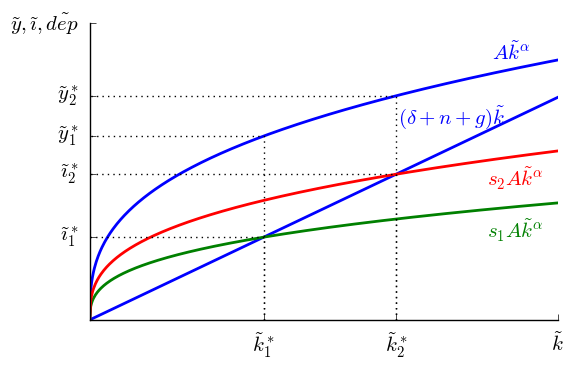

In [5]:
# Question 3(a)
A = 1
alpha = 0.35
s1=0.45
s2=0.65
delta = 6

step = 0.0001
k = np.arange(0,.06+step,step)
y = A*k**alpha
i1 = s1*A*k**alpha
i2 = s2*A*k**alpha
dep=delta*k

kss2 = (s2*A/(delta))**(1/(1-alpha))
yss2 = A*kss2**alpha
iss2 = s2*yss2
css2 = yss2-iss2

kss1 = (s1*A/(delta))**(1/(1-alpha))
yss1 = A*kss1**alpha
iss1 = s1*yss1
css1 = yss1-iss1


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(k,y,lw=2,color='blue')
ax.plot(k,dep,lw=2,color='blue')
ax.plot(k,i1,lw=2,color='green')
ax.plot(k,i2,lw=2,color='red')

ax.plot([kss1,kss1,0],[0,iss1,iss1],'k:',lw=1)
ax.plot([kss1,kss1,0],[0,yss1,yss1],'k:',lw=1)
ax.plot([kss2,kss2,0],[0,iss2,iss2],'k:',lw=1)
ax.plot([kss2,kss2,0],[0,yss2,yss2],'k:',lw=1)

ax.set_xticks([kss1,kss2,0.05])
ax.set_xticklabels(['$\\tilde{k}_1^*$','$\\tilde{k}_2^*$','$\\tilde{k}$'])
ax.set_yticks([iss1,iss2,yss1,yss2,0.4])
ax.set_yticklabels(['$\\tilde{\\imath}_1^*$','$\\tilde{\\imath}_2^*$','$\\tilde{y}_1^*$','$\\tilde{y}_2^*$','$\\tilde{y},\\tilde{\\imath},\\tilde{dep}$'])

ax.set_xlim([0,0.05])
ax.set_ylim([0,0.4])


ax.annotate('$A\\tilde{k}^{\\alpha}$', xy=(kss1, 0),  xycoords='data',xytext=(0.043,0.35), textcoords='data',color='blue')
ax.annotate('$(\\delta+ n + g)\\tilde{k}$', xy=(kss1, 0),  xycoords='data',xytext=(0.0329,0.264), textcoords='data',color='blue')
ax.annotate('$s_2A\\tilde{k}^{\\alpha}$', xy=(kss1, 0),  xycoords='data',xytext=(0.0425,0.18), textcoords='data',color='red')
ax.annotate('$s_1A\\tilde{k}^{\\alpha}$', xy=(kss1, 0),  xycoords='data',xytext=(0.0425,0.11), textcoords='data',color='green')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()
plt.savefig('Fig_Econ100C_Spring2016_Exam2_VersionA_Key_2a.png',bbox_inches='tight',dpi=120)